In [1]:
### import packages

## lets basic import packages
from tkinter import *
from tkinter import messagebox

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
     
# from pandas_profiling import ProfileReport


from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier  

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.metrics import *
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [2]:

#importing the dataset

data= pd.read_csv('dataset.csv')
#data= shuffle(data, random_state = 42)
data

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#remove ('_') underscore in the text

for col in data.columns:
    data[col] = data[col].str.replace('_', ' ')
    
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:

#data preprocessing

# check for null values from the dataset

data.isna().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [5]:

#clean the null values

data=data.fillna(0)
data.isna().sum()


Disease       0
Symptom_1     0
Symptom_2     0
Symptom_3     0
Symptom_4     0
Symptom_5     0
Symptom_6     0
Symptom_7     0
Symptom_8     0
Symptom_9     0
Symptom_10    0
Symptom_11    0
Symptom_12    0
Symptom_13    0
Symptom_14    0
Symptom_15    0
Symptom_16    0
Symptom_17    0
dtype: int64

In [6]:

# charactieristics of data

data.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920
unique,41,34,48,54,51,39,33,27,22,23,22,19,12,9,5,4,4,2
top,Fungal infection,vomiting,vomiting,fatigue,high fever,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,120,822,870,726,378,1206,1986,2652,2976,3228,3408,3726,4176,4416,4614,4680,4728,4848


In [7]:
cols= data.columns
l1=[]
l1=data["Disease"]
data1= data[cols].values.flatten()

reshaped = pd.Series(data1)
reshaped = reshaped.str.strip()
reshaped = reshaped.values.reshape(data.shape)

data = pd.DataFrame(reshaped, columns = data.columns)
data.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
l1

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: Disease, Length: 4920, dtype: object

In [9]:
## lets explore symptom severity

Symptom_severity = pd.read_csv('Symptom-severity.csv')
Symptom_severity.shape

(133, 2)

In [38]:
Symptom_severity['Symptom'] =Symptom_severity['Symptom'].str.replace('_',' ')
Symptom_severity.head(15)

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5
5,chills,3
6,joint pain,3
7,stomach pain,5
8,acidity,3
9,ulcers on tongue,4


In [11]:
## overall list
l2=[]
l2=Symptom_severity['Symptom'].unique()
l3=[]
l3=Symptom_severity['weight']

In [13]:
# lets encode sysptoms in the data

vals = data.values
symptoms =Symptom_severity['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = Symptom_severity[Symptom_severity['Symptom'] == symptoms[i]]['weight'].values[0]


In [14]:
data_processed = pd.DataFrame(vals, columns=cols)
data_processed=data_processed.fillna(0)
data_processed.head(11)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Fungal infection,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Fungal infection,1,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Fungal infection,1,3,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Fungal infection,1,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
## assign symptoms with no rank to zero

data_processed = data_processed.replace('dischromic  patches', 0)
data_processed = data_processed.replace('spotting  urination', 0)
data_processed = data_processed.replace('foul smell of urine', 0)
#le=preprocessing.LabelEncoder()
#data_processed['Disease']=le.fit_transform(data_processed['Disease'])
#data['Disease']=le.fit_transform(data['Disease'])
data_processed.head(11)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
#extracting features and target variables

x= data_processed.iloc[:,1:]
y=data[['Disease']]
np.ravel(y)


array(['Fungal infection', 'Fungal infection', 'Fungal infection', ...,
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [17]:
# split train and test data

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)


In [18]:
#performance testing

def performance (model, xtest, ytest):
    precision = precision_score(ytest,predict,average='micro')*100
    
    accuracy = accuracy_score(ytest,predict)*100
    
    f1 = f1_score(ytest,predict, average='macro')*100
    
    recall = recall_score(ytest,predict, average='macro')*100
    
    print('precision----->', precision) 
    print('\n************************')
    print('Accuracy----->', accuracy)
    print('\n************************')
    print('F1 Score----->', f1)
    print('\n************************')
    print('Recall----->', recall)
    print('\n************************')
    return accuracy, precision, f1, recall

In [19]:
# Machine Learning Algorithms

# 1) Naive_bayes

model=GaussianNB()
model.fit(xtrain,ytrain)
predict=model.predict(xtest)
    


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [20]:
model.score(xtrain,ytrain)
model.score(xtest,ytest)
performance (model, xtest, ytest)

precision-----> 85.77235772357723

************************
Accuracy-----> 85.77235772357723

************************
F1 Score-----> 85.61915747764832

************************
Recall-----> 86.44298538788827

************************


(85.77235772357723, 85.77235772357723, 85.61915747764832, 86.44298538788827)

In [21]:

# 2) SVR

model=SVC(kernel='linear')
model.fit(xtrain,ytrain)
predict=model.predict(xtest)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [22]:
model.score(xtrain,ytrain)
model.score(xtest,ytest)
performance (model, xtest, ytest)

precision-----> 98.47560975609755

************************
Accuracy-----> 98.47560975609755

************************
F1 Score-----> 98.66286845750449

************************
Recall-----> 98.69300607892268

************************


(98.47560975609755, 98.47560975609755, 98.66286845750449, 98.69300607892268)

In [23]:
# 3) GradientBoostingClassifier

model=GradientBoostingClassifier(learning_rate=0.1)
model.fit(xtrain,ytrain)
predict=model.predict(xtest)


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [24]:
model.score(xtrain,ytrain)
model.score(xtest,ytest)
performance (model, xtest, ytest)

precision-----> 99.28861788617887

************************
Accuracy-----> 99.28861788617887

************************
F1 Score-----> 99.36748973396615

************************
Recall-----> 99.29432581871606

************************


(99.28861788617887, 99.28861788617887, 99.36748973396615, 99.29432581871606)

In [25]:
# 4) RandomForest


model= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
model.fit(xtrain, ytrain) 
predict=model.predict(xtest)

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_6172/603198141.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)


In [26]:
model.score(xtrain,ytrain)
model.score(xtest,ytest)
performance (model, xtest, ytest)

precision-----> 99.28861788617887

************************
Accuracy-----> 99.28861788617887

************************
F1 Score-----> 99.36587677739871

************************
Recall-----> 99.33971709148737

************************


(99.28861788617887, 99.28861788617887, 99.36587677739871, 99.33971709148737)

In [27]:
newresult=model.predict([[3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
print(newresult)

['Fungal infection']


In [28]:


print(classification_report(ytest,predict))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        20
                                   Acne       1.00      1.00      1.00        26
                    Alcoholic hepatitis       1.00      1.00      1.00        22
                                Allergy       0.94      1.00      0.97        29
                              Arthritis       1.00      1.00      1.00        26
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       0.90      1.00      0.95        26
                            Chicken pox       1.00      1.00      1.00        23
                    Chronic cholestasis       1.00      1.00      1.00        17
                            Common Cold       1.00      1.00      1.00        24
                           

In [29]:
cf_matrix=confusion_matrix(ytest,predict)

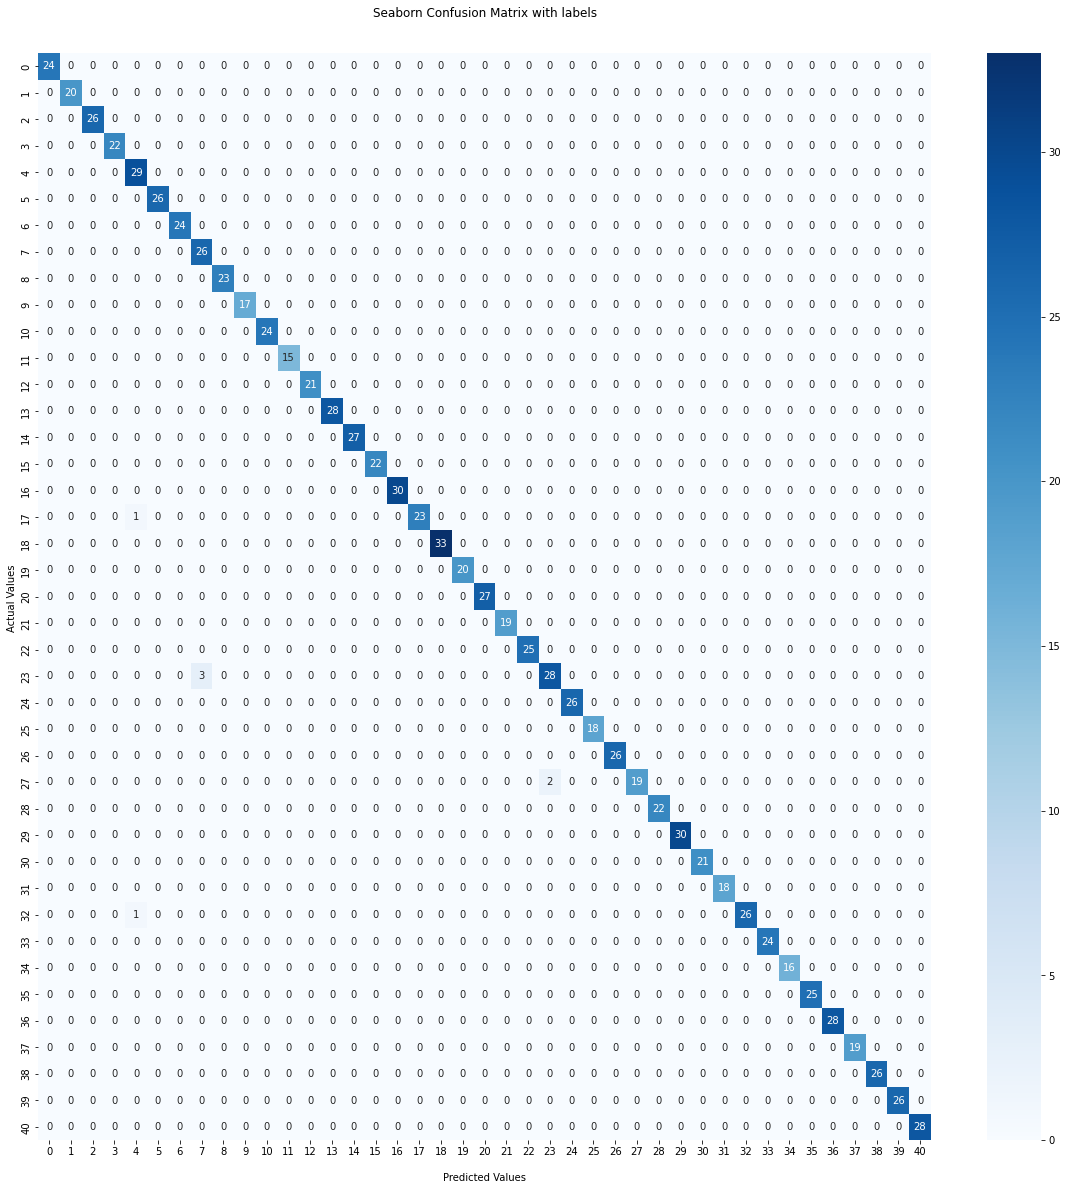

In [30]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()


In [108]:
# GUI interface

In [31]:
disease=data_processed['Disease']

def message():
    if (Symptom1.get() == "None" and  Symptom2.get() == "None" and Symptom3.get() == "None" and Symptom4.get() == "None" and Symptom5.get() == "None"):
        messagebox.showinfo("OPPS!!", "ENTER  SYMPTOMS PLEASE")
    else :
        RandomForest()


In [41]:
#RandomForest

def RandomForest():
    model= RandomForestClassifier(n_estimators= 10, criterion="entropy")
    model.fit(xtrain,ytrain)
    predict=model.predict(xtest)
    
    psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),0,0,0,0,0,0,0,0,0,0,0,0]
    psymptoms=psymptoms.map({'itching':1,'skin rash':3,'nodal skin eruptions':4,'continuous sneezing':4,'shivering':5,'chills':3,
                       'joint pain':3,'stomach pain':5,'acidity':3,'ulcers on tongue':4,'muscle wasting':3,'vomiting':5,
                       'burning micturition':6,'spotting urination':6,'fatigue':4,'weight gain':3,'anxiety':4,
                       'cold hands and feets':5,'mood swings':3,'weight loss':3,'restlessness':5,'lethargy':2,
                       'patches in throat':6,'irregular sugar level':5,'cough':4,'high fever':7,'sunken eyes':3,
                       'breathlessness':4,'sweating':3,'dehydration':4,'indigestion':5,'headache':3,'yellowish skin':3,
                       'dark urine':4,'nausea':5,'loss of appetite':4,'pain behind the eyes':4,'back pain':3,
                       'constipation':4,'abdominal pain':4,'diarrhoea':6,'mild fever':5,'yellow urine':4,
                       'yellowing of eyes':4,'acute liver failure':6,'fluid overload':6,'swelling of stomach':7,
                       'swelled lymph nodes':6,'malaise':6,'blurred and distorted vision':5,'phlegm':5,
                       'throat irritation':4,'redness of eyes':5,'sinus pressure':4,'runny nose':5,'congestion':5,
                       'chest pain':7,'weakness in limbs':7,'fast heart rate':5,'pain during bowel movements':5,
                       'pain in anal region':6,'bloody stool':5,'irritation in anus':6,'neck pain':5,'dizziness':4,
                       'cramps':4,'bruising':4,'obesity':4,'swollen legs':5,'swollen blood vessels':5,
                       'puffy face and eyes':5,'enlarged thyroid':6,'brittle nails':5,'swollen extremeties':5,
                       'excessive hunger':4,'extra marital contacts':5,'drying and tingling lips':4,'slurred speech':4,
                       'knee pain':3,'hip joint pain':2,'muscle weakness':2,'stiff neck':4,'swelling joints':5,
                       'movement stiffness':5,'spinning movements':6,'loss of balance':4,'unsteadiness':4,
                       'weakness of one body side':4,'loss of smell':3,'bladder discomfort':4,'foul smell ofurine':5,
                       'continuous feel of urine':6,'passage of gases':5,'internal itching':4,'toxic look (typhos)':5,
                       'depression':3,'irritability':2,'muscle pain':2,'altered sensorium':2,'red spots over body':3,
                       'belly pain':4,'abnormal menstruation':6,'dischromic patches':6,'watering from eyes':4,
                       'increased appetite':5,'polyuria':4,'family history':5,'mucoid sputum':4,'rusty sputum':4,
                       'lack of concentration':3,'visual disturbances':3,'receiving blood transfusion':5,
                       'receiving unsterile injections':2,'coma':7,'stomach bleeding':6,'distention of abdomen':4,
                       'history of alcohol consumption':5,'fluid overload':4,'blood in sputum':5,
                       'prominent veins on calf':6,'palpitations':4,'painful walking':2,'pus filled pimples':2,
                       'blackheads':2,'scurring':2,'skin peeling':3,'silver like dusting':2,'small_dents in nails':2,
                       'inflammatory nails':2,'blister':4,'red sore around nose':2,'yellow crust ooze':3,'prognosis':5,
                       'dischromic  patches':0,'spotting  urination':0,'foul smell of urine':0})



    predicted=model.predict([[psymptoms]])
    
    h='no'
    for a in range(0,len(disease)):
        if(disease[predicted] == disease[a]):
            h='yes'
            break

    if (h=='yes'):
        t3.delete("1.0", END)
        t3.insert(END, disease[a])
    else:
        t3.delete("1.0", END)
        t3.insert(END, "No Disease")


In [43]:
root = Tk()
root.title(" Disease Prediction From Symptoms")
root.configure()

Symptom1 = StringVar()
Symptom1.set(None)
Symptom2 = StringVar()
Symptom2.set(None)
Symptom3 = StringVar()
Symptom3.set(None)
Symptom4 = StringVar()
Symptom4.set(None)
Symptom5 = StringVar()
Symptom5.set(None)

w2 = Label(root, justify=LEFT, text=" Disease Prediction From Symptoms ")
w2.config(font=("Elephant", 30))
w2.grid(row=1, column=0, columnspan=2, padx=100)

NameLb1 = Label(root, text="")
NameLb1.config(font=("Elephant", 20))
NameLb1.grid(row=5, column=1, pady=10,  sticky=W)

S1Lb = Label(root,  text="Symptom 1")
S1Lb.config(font=("Elephant", 15))
S1Lb.grid(row=7, column=1, pady=10 , sticky=W)

S2Lb = Label(root,  text="Symptom 2")
S2Lb.config(font=("Elephant", 15))
S2Lb.grid(row=8, column=1, pady=10, sticky=W)

S3Lb = Label(root,  text="Symptom 3")
S3Lb.config(font=("Elephant", 15))
S3Lb.grid(row=9, column=1, pady=10, sticky=W)

S4Lb = Label(root,  text="Symptom 4")
S4Lb.config(font=("Elephant", 15))
S4Lb.grid(row=10, column=1, pady=10, sticky=W)

S5Lb = Label(root,  text="Symptom 5")
S5Lb.config(font=("Elephant", 15))
S5Lb.grid(row=11, column=1, pady=10, sticky=W)

lr = Button(root, text="Predict",height=2, width=20, command=message)
lr.config(font=("Elephant", 15))
lr.grid(row=15, column=1,pady=20)

OPTIONS = sorted(l2)

S1En = OptionMenu(root, Symptom1,*OPTIONS)
S1En.grid(row=7, column=2)

S2En = OptionMenu(root, Symptom2,*OPTIONS)
S2En.grid(row=8, column=2)

S3En = OptionMenu(root, Symptom3,*OPTIONS)
S3En.grid(row=9, column=2)

S4En = OptionMenu(root, Symptom4,*OPTIONS)
S4En.grid(row=10, column=2)

S5En = OptionMenu(root, Symptom5,*OPTIONS)
S5En.grid(row=11, column=2)

NameLb = Label(root, text="")
NameLb.config(font=("Elephant", 20))
NameLb.grid(row=13, column=1, pady=10,  sticky=W)

NameLb = Label(root, text="")
NameLb.config(font=("Elephant", 15))
NameLb.grid(row=18, column=1, pady=10,  sticky=W)

t3 = Text(root, height=2, width=30)
t3.config(font=("Elephant", 20))
t3.grid(row=20, column=1 , padx=10)

root.mainloop()


C:\Users\ADMIN\AppData\Local\Temp/ipykernel_6172/2123885648.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain,ytrain)
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\ADMIN\AppData\Local\Temp/ipykernel_6172/2575294566.py", line 23, in message
    RandomForest()
  File "C:\Users\ADMIN\AppData\Local\Temp/ipykernel_6172/2123885648.py", line 9, in RandomForest
    psymptoms=psymptoms.map({'itching':1,'skin rash':3,'nodal skin eruptions':4,'continuous sneezing':4,'shivering':5,'chills':3,
AttributeError: 'list' object has no attribute 'map'


In [47]:


    
psymptom=["itching","skin rash","nodal skin eruptions","continuous sneezing","shivering",0,0,0,0,0,0,0,0,0,0,0,0]
psymptom=psymptom[i].map({'itching':1,'skin rash':3,'nodal skin eruptions':4,'continuous sneezing':4,'shivering':5,'chills':3,
                       'joint pain':3,'stomach pain':5,'acidity':3,'ulcers on tongue':4,'muscle wasting':3,'vomiting':5,
                       'burning micturition':6,'spotting urination':6,'fatigue':4,'weight gain':3,'anxiety':4,
                       'cold hands and feets':5,'mood swings':3,'weight loss':3,'restlessness':5,'lethargy':2,
                       'patches in throat':6,'irregular sugar level':5,'cough':4,'high fever':7,'sunken eyes':3,
                       'breathlessness':4,'sweating':3,'dehydration':4,'indigestion':5,'headache':3,'yellowish skin':3,
                       'dark urine':4,'nausea':5,'loss of appetite':4,'pain behind the eyes':4,'back pain':3,
                       'constipation':4,'abdominal pain':4,'diarrhoea':6,'mild fever':5,'yellow urine':4,
                       'yellowing of eyes':4,'acute liver failure':6,'fluid overload':6,'swelling of stomach':7,
                       'swelled lymph nodes':6,'malaise':6,'blurred and distorted vision':5,'phlegm':5,
                       'throat irritation':4,'redness of eyes':5,'sinus pressure':4,'runny nose':5,'congestion':5,
                       'chest pain':7,'weakness in limbs':7,'fast heart rate':5,'pain during bowel movements':5,
                       'pain in anal region':6,'bloody stool':5,'irritation in anus':6,'neck pain':5,'dizziness':4,
                       'cramps':4,'bruising':4,'obesity':4,'swollen legs':5,'swollen blood vessels':5,
                       'puffy face and eyes':5,'enlarged thyroid':6,'brittle nails':5,'swollen extremeties':5,
                       'excessive hunger':4,'extra marital contacts':5,'drying and tingling lips':4,'slurred speech':4,
                       'knee pain':3,'hip joint pain':2,'muscle weakness':2,'stiff neck':4,'swelling joints':5,
                       'movement stiffness':5,'spinning movements':6,'loss of balance':4,'unsteadiness':4,
                       'weakness of one body side':4,'loss of smell':3,'bladder discomfort':4,'foul smell ofurine':5,
                       'continuous feel of urine':6,'passage of gases':5,'internal itching':4,'toxic look (typhos)':5,
                       'depression':3,'irritability':2,'muscle pain':2,'altered sensorium':2,'red spots over body':3,
                       'belly pain':4,'abnormal menstruation':6,'dischromic patches':6,'watering from eyes':4,
                       'increased appetite':5,'polyuria':4,'family history':5,'mucoid sputum':4,'rusty sputum':4,
                       'lack of concentration':3,'visual disturbances':3,'receiving blood transfusion':5,
                       'receiving unsterile injections':2,'coma':7,'stomach bleeding':6,'distention of abdomen':4,
                       'history of alcohol consumption':5,'fluid overload':4,'blood in sputum':5,
                       'prominent veins on calf':6,'palpitations':4,'painful walking':2,'pus filled pimples':2,
                       'blackheads':2,'scurring':2,'skin peeling':3,'silver like dusting':2,'small_dents in nails':2,
                       'inflammatory nails':2,'blister':4,'red sore around nose':2,'yellow crust ooze':3,'prognosis':5,
                       'dischromic  patches':0,'spotting  urination':0,'foul smell of urine':0})


predicted=model.predict([[psymptoms]])
predicted






AttributeError: 'str' object has no attribute 'map'